In [21]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=42)

In [23]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(X, y)

m_ols = model.coef_[0]
b_ols = model.intercept_

print("OLS slope (m):", m_ols)
print("OLS intercept (b):", b_ols)

OLS slope (m): -57.99225680635676
OLS intercept (b): 50.20315110942307


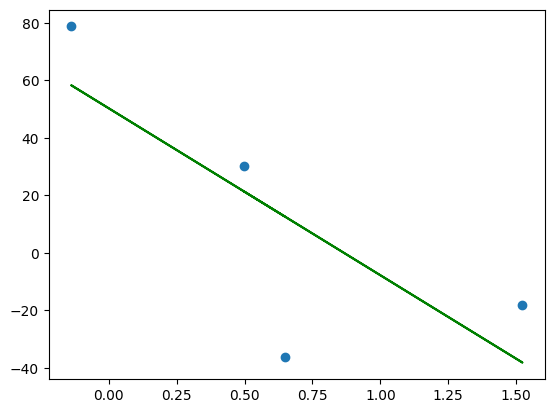

In [25]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='green')
plt.show()

##### we assume 

In [26]:
m = m_ols 
b = 100
lr = 0.01
# we only optimizing the b


In [27]:
#setup 
X_flat = X.ravel()
n = len(X_flat)

m = m_ols 
b = 100
lr = 0.01

sorted_idx = np.argsort(X_flat)
X_sorted = X_flat[sorted_idx]

### Iteration 1

In [28]:
loss_slope = -2 * np.sum(y - m*X_flat - b)
print("Iteration 1 slope:", loss_slope)

Iteration 1 slope: 398.3747911246154


In [29]:
step_size = lr * loss_slope
print("Iteration 1 step size:", step_size)

Iteration 1 step size: 3.9837479112461542


In [30]:
b = b - step_size
print("Iteration 1 new b:", b)

Iteration 1 new b: 96.01625208875384


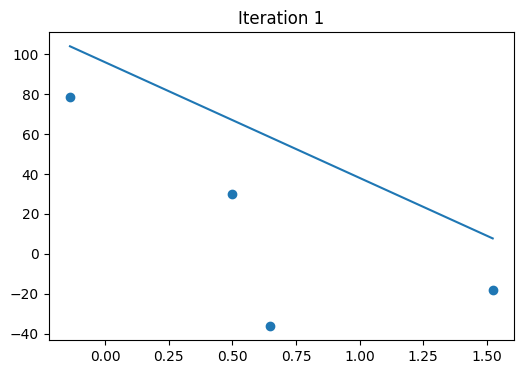

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(X_flat, y)
plt.plot(X_sorted, m*X_sorted + b)
plt.title("Iteration 1")
plt.show()

### Iteration 2

In [32]:
loss_slope = -2 * np.sum(y - m*X_flat - b)
print("Iteration 2 slope:", loss_slope)

step_size = lr * loss_slope
b = b - step_size

print("Iteration 2 new b:", b)

Iteration 2 slope: 366.50480783464616
Iteration 2 new b: 92.35120401040739


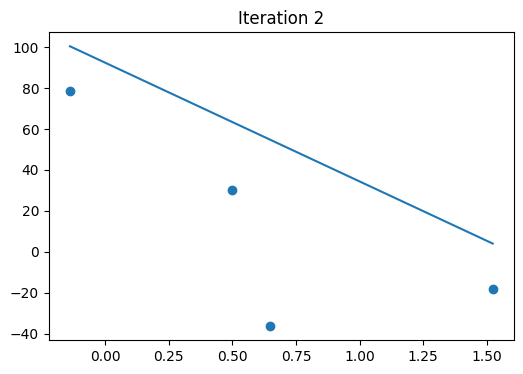

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(X_flat, y)
plt.plot(X_sorted, m*X_sorted + b)
plt.title("Iteration 2")
plt.show()

### Iteration 3

In [34]:
loss_slope = -2 * np.sum(y - m*X_flat - b)
print("Iteration 3 slope:", loss_slope)

step_size = lr * loss_slope
b = b - step_size

print("Iteration 3 new b:", b)

Iteration 3 slope: 337.18442320787454
Iteration 3 new b: 88.97935977832864


In [35]:
loss_slope = -2 * np.sum(y - m*X_flat - b)
print("Iteration 3 slope:", loss_slope)

step_size = lr * loss_slope
b = b - step_size

print("Iteration 3 new b:", b)

Iteration 3 slope: 310.20966935124454
Iteration 3 new b: 85.87726308481619


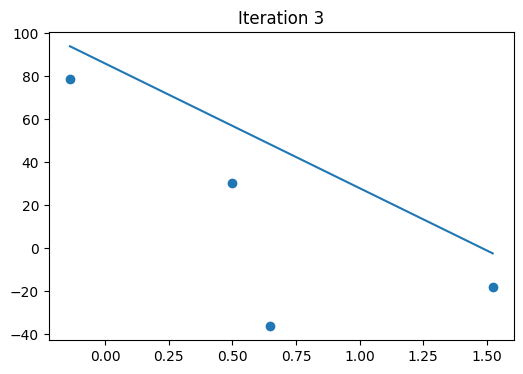

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(X_flat, y)
plt.plot(X_sorted, m*X_sorted + b)
plt.title("Iteration 3")
plt.show()

### Gradient Descent on Intercept (b) with Fixed Slope (m)

In this experiment, we assume that the slope \( m \) is already optimal 
(as obtained from OLS), and we focus only on optimizing the intercept \( b \).

Since the slope is correct, the regression line has the correct tilt.
We only need to shift the line vertically to minimize the loss.

The loss function is:

$$
L = \sum_{i=1}^{n} (y_i - (m x_i + b))^2
$$

We compute the derivative of the loss with respect to \( b \):

$$
\frac{dL}{db} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - m x_i - b)
$$

Gradient Descent update rule:

$$
b_{new} = b_{old} - \alpha \frac{dL}{db}
$$

Where:

- \( \alpha \) is the learning rate
- The derivative tells us the direction and magnitude of change
- If the derivative is positive → decrease \( b \)
- If the derivative is negative → increase \( b \)

Since the slope \( m \) is fixed correctly, the loss function 
becomes a quadratic function in terms of \( b \).

Therefore, Gradient Descent will converge smoothly toward 
the optimal intercept.


In [39]:
# let's run 100 iteration

In [47]:
X_flat = X.ravel()
n = len(X_flat)

m = m_ols
b = 100
lr = 0.07

for i in range(100):
    
    y_pred = m * X_flat + b
    loss_slope = (-2/n) * np.sum(y - y_pred)
    
    step_size = lr * loss_slope
    b = b - step_size
    
    print(f"Iteration {i+1:2d} | slope of the loss function = {loss_slope:.4f} | b = {b:.4f}")

Iteration  1 | slope of the loss function = 99.5937 | b = 93.0284
Iteration  2 | slope of the loss function = 85.6506 | b = 87.0329
Iteration  3 | slope of the loss function = 73.6595 | b = 81.8767
Iteration  4 | slope of the loss function = 63.3472 | b = 77.4424
Iteration  5 | slope of the loss function = 54.4786 | b = 73.6289
Iteration  6 | slope of the loss function = 46.8516 | b = 70.3493
Iteration  7 | slope of the loss function = 40.2923 | b = 67.5289
Iteration  8 | slope of the loss function = 34.6514 | b = 65.1033
Iteration  9 | slope of the loss function = 29.8002 | b = 63.0172
Iteration 10 | slope of the loss function = 25.6282 | b = 61.2233
Iteration 11 | slope of the loss function = 22.0402 | b = 59.6805
Iteration 12 | slope of the loss function = 18.9546 | b = 58.3536
Iteration 13 | slope of the loss function = 16.3010 | b = 57.2126
Iteration 14 | slope of the loss function = 14.0188 | b = 56.2312
Iteration 15 | slope of the loss function = 12.0562 | b = 55.3873
Iteration 

In [49]:
X_flat = X.ravel()
sorted_idx = np.argsort(X_flat)
X_sorted = X_flat[sorted_idx]

m = m_ols
b = 100
lr = 0.01
n = len(X_flat)

b_history = []

for i in range(100):
    y_pred = m * X_flat + b
    loss_slope = (-2/n) * np.sum(y - y_pred)
    b = b - lr * loss_slope
    b_history.append(b)

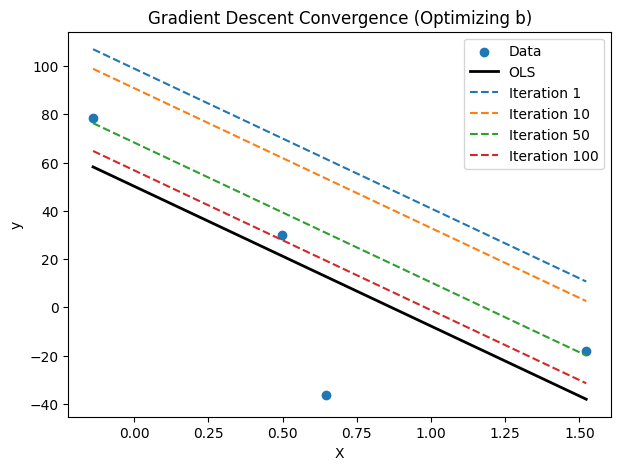

In [50]:
plt.figure(figsize=(7,5))

plt.scatter(X_flat, y, label="Data")

# OLS line
plt.plot(X_sorted,
         model.predict(X_sorted.reshape(-1,1)),
         color='black',
         linewidth=2,
         label='OLS')

# Selected GD iterations
for idx in [0, 9, 49, 99]:
    b_val = b_history[idx]
    y_line = m * X_sorted + b_val
    plt.plot(X_sorted, y_line,
             linestyle='--',
             label=f"Iteration {idx+1}")

plt.legend()
plt.title("Gradient Descent Convergence (Optimizing b)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [51]:
difference = abs(b - b_ols)
print("Difference:", difference)

Difference: 6.60403598482646


#### Convergence Detection 

In [52]:
X_flat = X.ravel()
n = len(X_flat)

# Fixed optimal slope
m = m_ols

# Start from wrong intercept
b = 100

lr = 0.07
tolerance = 1e-6
max_epochs = 10000

best_iteration = None

# Precompute OLS loss for reference
loss_ols = np.mean((y - (m * X_flat + b_ols))**2)

for i in range(max_epochs):
    
    # Predictions
    y_pred = m * X_flat + b
    
    # Compute gradient
    loss_slope = (-2/n) * np.sum(y - y_pred)
    
    # Update
    b = b - lr * loss_slope
    
    # Compute GD loss
    loss_gd = np.mean((y - (m * X_flat + b))**2)
    
    # Check convergence conditions
    param_close = abs(b - b_ols) < tolerance
    loss_close = abs(loss_gd - loss_ols) < tolerance
    gradient_small = abs(loss_slope) < tolerance
    
    if param_close and loss_close and gradient_small:
        best_iteration = i + 1
        break

print("Best convergence iteration:", best_iteration)
print("Final GD intercept:", b)
print("OLS intercept:", b_ols)
print("Final gradient magnitude:", abs(loss_slope))


Best convergence iteration: 124
Final GD intercept: 50.203151485268975
OLS intercept: 50.20315110942307
Final gradient magnitude: 8.740602321921642e-07
